In [16]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [17]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

  OD_pair  demand
0   r1-s1    1000


In [18]:
def bus_frequency(x, f_bus):
    if x['attribute'] in['P&R','R&T']:
        return f_bus
    elif x['attribute'] in['transit','board_transit']:
        return 10
    else:
        return 0

In [19]:
my_link['f_bus'] = my_link.apply(bus_frequency, f_bus=2, axis=1)

In [20]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1']
destination_zone = ['s1']
theta_1 = 1# path
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

def bus_frequency(x, f_bus):
    if x['attribute'] in ['P&R','R&T']:
        return f_bus
    elif x['attribute'] in ['transit','board_transit']:
        return f_bus
    else:
        return 0

frequency =np.arange(3, 20, 1)
df = []
for f_bus in frequency:
    my_link['f_bus'] = my_link.apply(bus_frequency, f_bus=f_bus, axis=1)
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# path_flow
path_1_flow = [df[i][2].tail(4).iloc[0]['path_flow'] for i in range(len(df))]
path_2_flow = [df[i][2].tail(4).iloc[1]['path_flow'] for i in range(len(df))]
path_3_flow = [df[i][2].tail(4).iloc[2]['path_flow'] for i in range(len(df))]
path_4_flow = [df[i][2].tail(4).iloc[3]['path_flow'] for i in range(len(df))]

# path_duration
path_1_duration = [df[i][2].tail(4).iloc[0]['path_duration'] for i in range(len(df))]
path_2_duration = [df[i][2].tail(4).iloc[1]['path_duration'] for i in range(len(df))]
path_3_duration = [df[i][2].tail(4).iloc[2]['path_duration'] for i in range(len(df))]
path_4_duration = [df[i][2].tail(4).iloc[3]['path_duration'] for i in range(len(df))]

# path_cost
path_1_cost = [abs(df[i][2].tail(4).iloc[0]['path_cost']) for i in range(len(df))]
path_2_cost = [abs(df[i][2].tail(4).iloc[1]['path_cost']) for i in range(len(df))]
path_3_cost = [abs(df[i][2].tail(4).iloc[2]['path_cost']) for i in range(len(df))]
path_4_cost = [abs(df[i][2].tail(4).iloc[3]['path_cost']) for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'frequency': frequency,
        'path_1_flow': path_1_flow,
        'path_2_flow': path_2_flow,
        'path_3_flow': path_3_flow,
        'path_4_flow': path_4_flow,
        'path_1_cost': path_1_cost,
        'path_2_cost': path_2_cost,
        'path_3_cost': path_3_cost,
        'path_4_cost': path_4_cost,
        'path_1_duration': path_1_duration,
        'path_2_duration': path_2_duration,
        'path_3_duration': path_3_duration,
        'path_4_duration': path_4_duration,})

dfx['total_cost'] = dfx['path_1_flow'] * dfx['path_1_cost'] + dfx['path_2_flow'] * dfx['path_2_cost'] + dfx['path_3_flow'] * dfx['path_3_cost'] + dfx['path_4_flow'] * dfx['path_4_cost']

  OD_pair  demand
0   r1-s1    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4']
['auto', 'P&R', 'transit', 'R&T']
Iteration = 1, gap = 1.3403711843802788,
the number of idle_hailing:500.0
Iteration = 2, gap = 7.149596208848382,
the number of idle_hailing:403.87807815622944
Iteration = 3, gap = 3.505847730287917,
the number of idle_hailing:401.60612638915507
Iteration = 4, gap = 2.3166559472673214,
the number of idle_hailing:401.5553426592227
Iteration = 5, gap = 1.7276543389851375,
the number of idle_hailing:401.5629003876946
Iteration = 6, gap = 1.3763872958277803,
the number of idle_hailing:401.5697316267713
Iteration = 7, gap = 1.1432431630017463,
the number of idle_hailing:401.5750001152503
Iteration = 8, gap = 0.9772890493153792,
the number of idle_hailing:401.57916839273156
Iteration = 9, gap = 0.8531779779777718,
the number of idle_hailing:401.58255150296213
Iteration = 10, gap = 0.75688009234833,
the number of idle_hailing:401.5853551432402
Iteration = 11, gap = 0.680002879

In [21]:
dfx

,frequency,path_1_flow,path_2_flow,path_3_flow,path_4_flow,path_1_cost,path_2_cost,path_3_cost,path_4_cost,path_1_duration,path_2_duration,path_3_duration,path_4_duration,total_cost
0,3,254.530300,238.497025,257.933839,249.038836,107.014490,172.219415,96.950194,125.355690,34.876695,198.508220,212.394751,193.970133,124537.419130
1,4,248.686050,238.078878,262.353465,250.881608,104.269647,142.821997,68.204601,97.635251,33.982134,132.425556,144.405329,128.440066,102321.909496
2,5,246.071770,237.962521,264.280377,251.685332,103.104444,131.357917,57.061441,86.882328,33.602387,106.983969,118.261744,103.232607,93576.580978
3,6,244.750206,237.917349,265.243853,252.088592,102.528899,125.858068,51.735178,81.733919,33.414813,94.911901,105.878714,91.276203,89364.413746
4,7,244.001972,237.896200,265.785173,252.316655,102.207086,122.821634,48.803360,78.894010,33.309932,88.317038,99.128065,84.746008,87035.012747
5,8,243.538699,237.884913,266.118295,252.458093,102.009340,120.966735,47.017131,77.159857,33.245486,84.329552,95.055401,80.798250,85611.132366
6,9,243.230524,237.878314,266.338759,252.552404,101.878467,119.744209,45.842851,76.017225,33.202833,81.727565,92.403794,78.222547,84672.564344
7,10,243.013588,237.874180,266.493257,252.618974,101.786681,118.889845,45.024184,75.218877,33.172920,79.926398,90.572326,76.439808,84016.727797
8,11,242.854727,237.871427,266.605936,252.667910,101.719645,118.264743,44.426350,74.634678,33.151072,78.619928,89.246617,75.146794,83537.016460
9,12,242.733728,237.869522,266.691453,252.705297,101.668696,117.790006,43.973205,74.191019,33.134468,77.635811,88.249978,74.172900,83172.815559


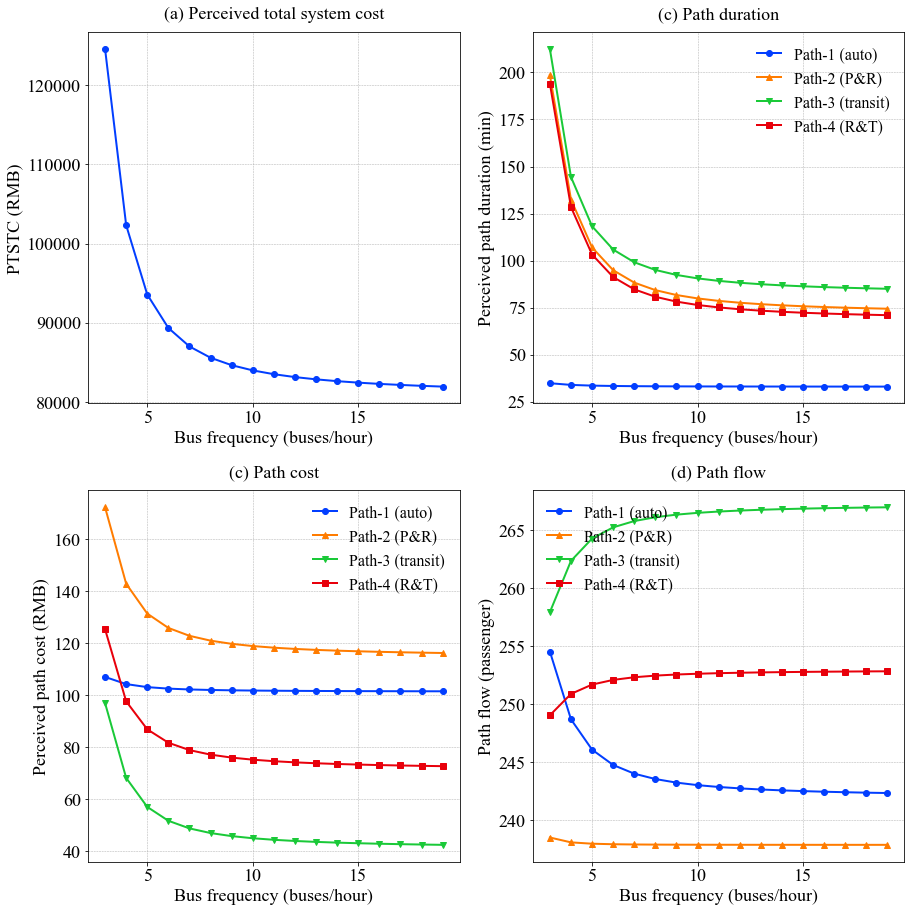

In [23]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,13))

ax = plt.subplot(2,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['total_cost'], '-', lw=2, marker='o')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('PTSTC (RMB)')
ax.set_title('(a) Perceived total system cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['path_1_duration'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['frequency'], dfx['path_2_duration'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['frequency'], dfx['path_3_duration'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['frequency'], dfx['path_4_duration'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('Perceived path duration (min)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) # ,bbox_to_anchor = (1,0.6)
ax.set_title('(c) Path duration', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,3)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['path_1_cost'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['frequency'], dfx['path_2_cost'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['frequency'], dfx['path_3_cost'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['frequency'], dfx['path_4_cost'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('Perceived path cost (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) # ,bbox_to_anchor = (1,0.4)
ax.set_title('(c) Path cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,4)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['frequency'], dfx['path_1_flow'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['frequency'], dfx['path_2_flow'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['frequency'], dfx['path_3_flow'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['frequency'], dfx['path_4_flow'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Bus frequency (buses/hour)')
ax.set_ylabel('Path flow (passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5 ) #, bbox_to_anchor = (1,0.9),
ax.set_title('(d) Path flow', fontsize=18, loc='center', y=1.02)

plt.tight_layout()
plt.show()